Saving Cute_dog (1).jpg to Cute_dog (1) (3).jpg
Image dimensions: 400x600


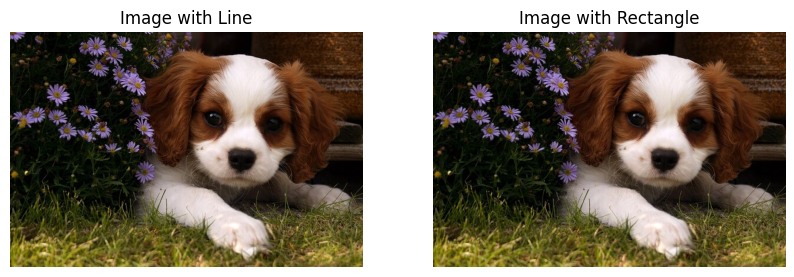

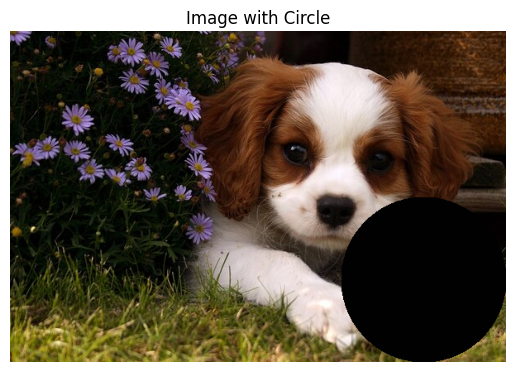

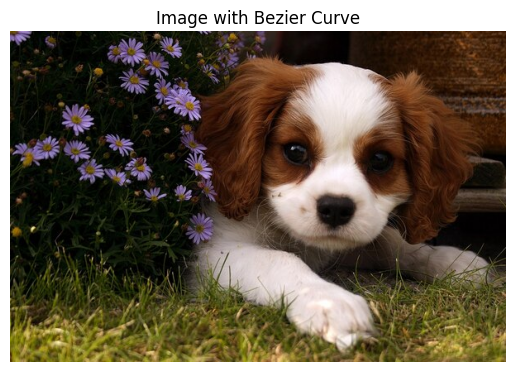

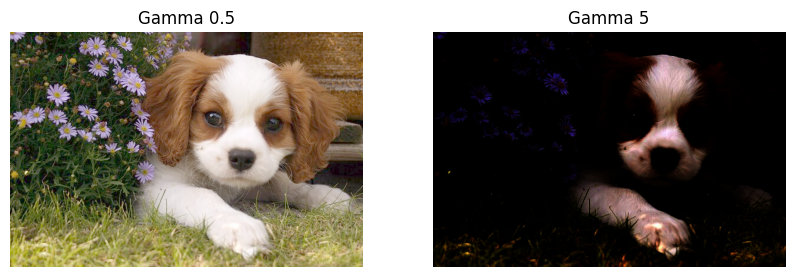

In [8]:
# Import necessary libraries
from google.colab import files
from skimage import io, draw, exposure
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

# Get the filename of the uploaded file
filename = next(iter(uploaded))

# Read the image
img = io.imread(filename)

# Check image dimensions
height, width, _ = img.shape
print(f"Image dimensions: {height}x{width}")

# ==========================
# SECTION: Draw a Line
# ==========================
# Draw a line with coordinates within the image bounds
line_end_x = min(999, width - 1)  # Ensure x does not exceed width
line_end_y = min(999, height - 1)  # Ensure y does not exceed height

x, y = draw.line(0, 0, line_end_x, line_end_y)
img_line = img.copy()  # Create a copy of the original image

# Ensure the indices are valid
if x.max() < height and y.max() < width:
    img_line[x, y] = 0  # Set the line pixels to black

# Show the image with the line
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_line)
plt.title("Image with Line")
plt.axis('off')

# ==========================
# SECTION: Draw a Rectangle
# ==========================
# Function to draw a rectangle
def rectangle(x, y, w, h):
    rr, cc = draw.polygon([x, x + w, x + w, x], [y, y, y + h, y + h])
    return rr, cc

# Draw a rectangle
img_rect = img.copy()  # Create a copy of the original image
rect_width = min(500, width - 10)  # Ensure rectangle fits within bounds
rect_height = min(500, height - 10)  # Ensure rectangle fits within bounds
rr, cc = rectangle(10, 10, rect_width, rect_height)

# Ensure the indices are valid
if rr.max() < height and cc.max() < width:
    img_rect[rr, cc] = 1  # Set the rectangle pixels to white

# Show the image with the rectangle
plt.subplot(1, 2, 2)
plt.imshow(img_rect)
plt.title("Image with Rectangle")
plt.axis('off')

plt.show()

# ==========================
# SECTION: Draw a Circle
# ==========================
# Define circle coordinates and radius
img_circle = img.copy()  # Create a copy of the original image
circle_radius = min(100, min(height, width) // 2)  # Adjust radius to fit image

# Ensure circle center is within bounds
circle_center_x = min(500, height - circle_radius)
circle_center_y = min(500, width - circle_radius)
x, y = draw.disk((circle_center_x, circle_center_y), circle_radius)

# Draw circle
if x.max() < height and y.max() < width:
    img_circle[x, y] = 1  # Set the circle pixels to white

# Show the image with the circle
plt.figure()
plt.imshow(img_circle)
plt.title("Image with Circle")
plt.axis('off')
plt.show()

# ==========================
# SECTION: Draw a Bezier Curve
# ==========================
# Create a new copy for Bezier curve
img_bezier = img.copy()  # Create a copy of the original image

# Define Bezier curve coordinates, ensure they fit within bounds
bezier_start_x, bezier_start_y = 0, 0
bezier_control_x, bezier_control_y = min(500, width), min(500, height)
bezier_end_x, bezier_end_y = min(900, width), min(1200, height)

# Draw Bezier curve
x, y = draw.bezier_curve(bezier_start_x, bezier_start_y, bezier_control_x, bezier_control_y, bezier_end_x, bezier_end_y, 100)

# Ensure the indices are valid
if x.max() < height and y.max() < width:
    img_bezier[x, y] = 1  # Set the curve pixels to white

# Show the image with the Bezier curve
plt.figure()
plt.imshow(img_bezier)
plt.title("Image with Bezier Curve")
plt.axis('off')
plt.show()

# ==========================
# SECTION: Gamma Correction
# ==========================
# Apply gamma correction
gamma_corrected1 = exposure.adjust_gamma(img, 0.5)
gamma_corrected2 = exposure.adjust_gamma(img, 5)

# Show gamma-corrected images
plt.figure(figsize=(10, 5))

# Gamma correction 0.5
plt.subplot(1, 2, 1)
plt.imshow(gamma_corrected1)
plt.title("Gamma 0.5")
plt.axis('off')

# Gamma correction 5
plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected2)
plt.title("Gamma 5")
plt.axis('off')

plt.show()
